##  Segmentation & Targeting

## Step 1: Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib.ticker import FuncFormatter

In [2]:
pd.set_option('display.float_format', '{:.2f}'.format)

## Step 2: Loading the Dataset

In [3]:
family = pd.read_csv(r'family_segments.csv')
family

,hhold_ID,est_net_worth,est_inc,domestic,number_visits,number_children,oldest_child_age,dis_plus_sub,online_merch_avg,est_annual_travel,est_annual_leisure,est_hhold_FICO
0,1,7525,7825,1,0,2,9.00,0,826.00,2309.00,4094.00,701
1,2,639815,449775,1,1,2,11.00,0,1779.00,9060.00,8670.00,764
2,3,288847,204750,1,6,3,13.00,1,2121.00,6436.00,5021.00,720
3,4,191791,136730,1,1,1,8.00,1,1880.00,13107.00,66074.00,783
4,5,96527,72165,0,3,0,NaN,0,775.00,2042.00,2846.00,757
...,...,...,...,...,...,...,...,...,...,...,...,...
9245,9246,129634,95375,1,1,2,11.00,0,816.00,487.00,4318.00,767
9246,9247,5039615,3526325,1,8,2,17.00,1,1740.00,23538.00,67016.00,751
9247,9248,259279,184580,1,0,2,9.00,1,1843.00,6320.00,5843.00,749
9248,9249,43471,33375,1,1,2,13.00,0,760.00,1215.00,1189.00,791


## Step 3: Exploring the Dataset

In [4]:
family.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9250 entries, 0 to 9249
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   hhold_ID            9250 non-null   int64  
 1   est_net_worth       9250 non-null   int64  
 2   est_inc             9250 non-null   int64  
 3   domestic            9250 non-null   int64  
 4   number_visits       9250 non-null   int64  
 5   number_children     9250 non-null   int64  
 6   oldest_child_age    8724 non-null   float64
 7   dis_plus_sub        9250 non-null   int64  
 8   online_merch_avg    9250 non-null   float64
 9   est_annual_travel   9250 non-null   float64
 10  est_annual_leisure  9250 non-null   float64
 11  est_hhold_FICO      9250 non-null   int64  
dtypes: float64(4), int64(8)
memory usage: 867.3 KB


In [5]:
family.isnull().sum()

hhold_ID                0
est_net_worth           0
est_inc                 0
domestic                0
number_visits           0
number_children         0
oldest_child_age      526
dis_plus_sub            0
online_merch_avg        0
est_annual_travel       0
est_annual_leisure      0
est_hhold_FICO          0
dtype: int64

In [6]:
family.isna().sum()

hhold_ID                0
est_net_worth           0
est_inc                 0
domestic                0
number_visits           0
number_children         0
oldest_child_age      526
dis_plus_sub            0
online_merch_avg        0
est_annual_travel       0
est_annual_leisure      0
est_hhold_FICO          0
dtype: int64

In [7]:
missing_percentage = family.isna().sum()/len(family)*100
missing_percentage

hhold_ID             0.00
est_net_worth        0.00
est_inc              0.00
domestic             0.00
number_visits        0.00
number_children      0.00
oldest_child_age     5.69
dis_plus_sub         0.00
online_merch_avg     0.00
est_annual_travel    0.00
est_annual_leisure   0.00
est_hhold_FICO       0.00
dtype: float64

<strong>RESULTS:</strong><br>
- Our variables are numeric so far.
- 526 records are missing inside the oldest_child_age variable.
    - We will either drop or investigate more them to find if there is relationship with another column such as number_children.

## Step 4: Analyzing Columns

### Verifying unique ID

In [8]:
# This is a unique ID for each row - not used for statistical analysis
unique_hhold_IDs = family['hhold_ID'].nunique() == len(family['hhold_ID'])
unique_hhold_IDs

True

<strong>RESULTS:</strong><br>
- This check is done to ensure that the ID column is indeed unique and does not contain any duplicate entries. 
- This variable will not be used in the clustering algorithm.
    - We will drop it.

## Step 5: Drop Column

In [9]:
#remove the unique identifier
family.drop('hhold_ID', axis=1, inplace=True)

In [10]:
family.columns

Index(['est_net_worth', 'est_inc', 'domestic', 'number_visits',
       'number_children', 'oldest_child_age', 'dis_plus_sub',
       'online_merch_avg', 'est_annual_travel', 'est_annual_leisure',
       'est_hhold_FICO'],
      dtype='object')

## Step 6: Statistical Summary and Further Investigation for Each Column

### Number of Children Column

#### Stats of number_children:

In [11]:
# number_children: number of children
# quantitative variable, range = 0-7
summary_number_children = family['number_children'].describe()
summary_number_children

count   9250.00
mean       2.22
std        1.12
min        0.00
25%        1.00
50%        2.00
75%        3.00
max        7.00
Name: number_children, dtype: float64

<strong>RESULTS:</strong><br>
|                 | count | mean | std  | min | 25% | 50% | 75% | max |
|-----------------|-------|------|------|-----|-----|-----|-----|-----|
| number_children | 9250  | 2.22 | 1.12 | 0.00| 1.00| 2.00| 3.00| 7.00 |

- This is a statistical summary of the number of children. 
- The range is from 0 to 7, with a mean of 2.22 children.

#### Frequency of number_children:

In [12]:
# quantitative variable, range = 0-7
frequency_number_children = family['number_children'].value_counts().sort_index()
frequency_number_children

number_children
0     526
1    1904
2    3121
3    2576
4     939
5     164
6      18
7       2
Name: count, dtype: int64

<strong>RESULTS:</strong><br>
- This table shows the frequency of the number of children in each family. 
- The majority of families visit either 1, 2, or 3 children.
- 526 represents visitors who does not have a child. 
    - We will check that number if match with oldest_child_age missing numbers.

### Oldest Child Age Column

#### Stats of oldest_child_age:

In [13]:
# oldest_child_age: age of oldest child
# quantitative variable, range = 5-18
summary_oldest_child = family['oldest_child_age'].describe()
summary_oldest_child

count   8724.00
mean      11.98
std        2.02
min        5.00
25%       11.00
50%       12.00
75%       13.00
max       18.00
Name: oldest_child_age, dtype: float64

<strong>RESULTS:</strong><br>
|              | count | mean | std  | min | 25% | 50% | 75% | max |
|--------------|-------|------|------|-----|-----|-----|-----|-----|
| oldest_child | 8724  | 11.98| 2.02 | 5.00| 11.00| 12.00| 13.00| 18.00 |

- This is a statistical summary of the age of the oldest child. 
- The range is from 5 to 18, with a mean age of 11.98.

#### Frequency of oldest_child_age:

In [14]:
# quantitative variable, range = 5-18
# there are 526 observations with a missing age
frequency_oldest_age = family['oldest_child_age'].value_counts(dropna=False).sort_index()
frequency_oldest_age 

oldest_child_age
5.00        4
6.00       29
7.00       80
8.00      255
9.00      618
10.00     997
11.00    1469
12.00    1788
13.00    1530
14.00    1058
15.00     557
16.00     248
17.00      75
18.00      16
NaN       526
Name: count, dtype: int64

<strong>RESULTS:</strong><br>
- This table shows the frequency of the ages of the oldest child in each family. 
- The majority of families oldest child is between 11-14 in age. 
- Also, there are 526 observations missing value. 
    - We will handle these appropriately for the analysis.

### Replace NaN with None:

In [15]:
family['oldest_child_age'] = family['oldest_child_age'].replace(np.nan, 'None')

# Now use pd.crosstab to create the cross-tabulation
cross_tabulation = pd.crosstab(
    family['oldest_child_age'],
    family['number_children'],
    dropna=False  # This should not be necessary now since there are no NaN values
)

print(cross_tabulation)

number_children     0    1    2    3    4   5  6  7
oldest_child_age                                   
5.0                 0    1    2    1    0   0  0  0
6.0                 0    7   11    8    2   1  0  0
7.0                 0   22   28   21    7   2  0  0
8.0                 0   66   88   70   24   5  2  0
9.0                 0  127  219  180   78  14  0  0
10.0                0  236  335  293  108  22  3  0
11.0                0  319  509  447  169  24  1  0
12.0                0  406  630  538  172  37  5  0
13.0                0  322  559  459  161  24  4  1
14.0                0  215  385  304  131  21  1  1
15.0                0  110  215  169   52  10  1  0
16.0                0   57   98   64   26   2  1  0
17.0                0   14   36   18    5   2  0  0
18.0                0    2    6    4    4   0  0  0
None              526    0    0    0    0   0  0  0


<strong>RESULTS:</strong><br>
- We did not drop missing values. Because it affect number_children range wrongly.
- After setting NANs to "None", we can see, the observations that were missing an age were the families without children.

### Estimated Net Worth Column

#### Stats of est_net_worth:

In [16]:
# est_net_worth = estimate of household's net worth
# quantitative variable, range = 51-9883250
summary_est_net_worth = family['est_net_worth'].describe()
summary_est_net_worth

count      9250.00
mean     673905.57
std     1335709.32
min          51.00
25%       42649.50
50%      166652.00
75%      648823.00
max     9883250.00
Name: est_net_worth, dtype: float64

<strong>RESULTS:</strong><br>
|                     | count | mean      | std       | min  | 25%     | 50%      | 75%     | max      |
|---------------------|-------|-----------|-----------|------|---------|----------|---------|----------|
| summary_est_net_worth | 9250  | 673905.57 | 1335709.32| 51   | 42649.5 | 166652   | 648823  | 9883250  |

- Here is a statisitcal summary of the estimated net worth. 
- The statistics indicate that the distribution may be skewed right since the mean is much larger than the median.

#### Histogram of est_net_worth:

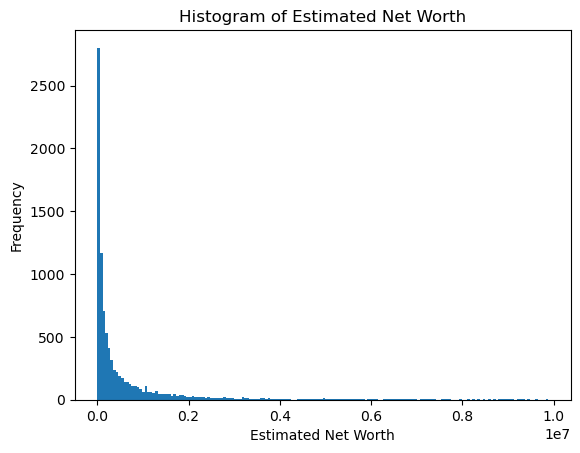

In [17]:
# quantitative variable, range = 51 to 9883250, skewed right
plt.hist(family['est_net_worth'], bins='auto') 
plt.title('Histogram of Estimated Net Worth')
plt.xlabel('Estimated Net Worth')
plt.ylabel('Frequency')
plt.show()

<strong>RESULTS:</strong><br>
- The distribution of Net Worth is very much skewed right, which can be a problem for clustering. 
- Instead, we take the logarithm of this variable to see if the distribution is more symmetric.

#### Log Function for est_net_worth:

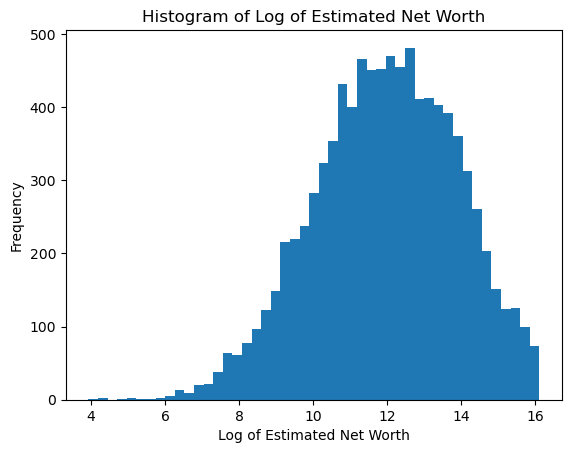

In [18]:
# makes distribution much more symmetric
plt.hist(np.log(family['est_net_worth']), bins='auto') 
plt.title('Histogram of Log of Estimated Net Worth')
plt.xlabel('Log of Estimated Net Worth')
plt.ylabel('Frequency')
plt.show()

<strong>RESULTS:</strong><br>
- As we can see, the distribution of the logarithm of net worth is much more symmetrical, thus it will work out better for the clustering algorithm. 
- We'll use the logarithm of net worth in the clustering algorithm.

### Estimated Income Column

#### Stats of est_inc:

In [19]:
# est_net_worth = estimate of household's net worth
# quantitative variable, range = 370-5497405
summary_est_net_inc = family['est_inc'].describe()
summary_est_net_inc

count      9250.00
mean     475877.39
std      876427.87
min         370.00
25%       33270.00
50%      122465.00
75%      455330.00
max     5497405.00
Name: est_inc, dtype: float64

<strong>RESULTS:</strong><br>
|                     | count | mean      | std       | min  | 25%     | 50%      | 75%     | max      |
|---------------------|-------|-----------|-----------|------|---------|----------|---------|----------|
| summary est net inc | 9250  | 475877.39 | 876427.87| 370   | 33270.00 | 122465.00  | 455330.00  | 5497405.00 |

- Here is a statisitcal summary of the estimated income. 

#### Histogram of est_inc:

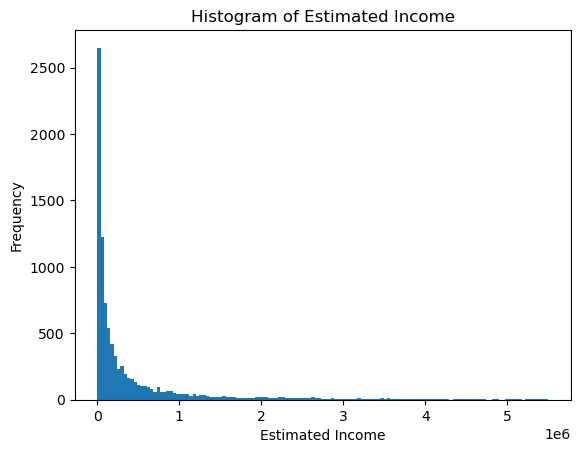

In [20]:
# quantitative variable, range = 370 to 5497405, skewed right
plt.hist(family['est_inc'], bins='auto')
plt.title('Histogram of Estimated Income')
plt.xlabel('Estimated Income')
plt.ylabel('Frequency')
plt.show()

<strong>RESULTS:</strong><br>
- The distribution of Estimated Income is very much skewed right, which can be a problem for clustering. 
- Instead, we take the logarithm of this variable to see if the distribution is more symmetric.

#### Log Function for est_inc:

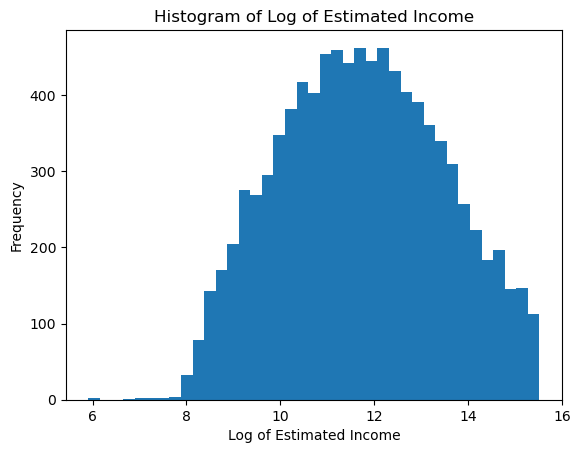

In [21]:
# making distribution much more symmetric
plt.hist(np.log(family['est_inc'].dropna()), bins='auto') 
plt.title('Histogram of Log of Estimated Income')
plt.xlabel('Log of Estimated Income')
plt.ylabel('Frequency')
plt.show()

<strong>RESULTS:</strong><br>
- As we can see, the distribution of the logarithm of estimated income is much more symmetrical, thus it will work out better for the clustering algorithm. 
- We'll use the logarithm of estimated income in the clustering algorithm.

### Domestic Column

#### Frequency of domestic:

In [22]:
# domestic: 1= domestic, 0 = international
# categorical variable, 0 or 1
frequency_table_domestic = family['domestic'].value_counts()
frequency_table_domestic 

domestic
1    6699
0    2551
Name: count, dtype: int64

<strong>RESULTS:</strong><br>
- US family is 6699.
- International family is 2551.

### Number of Visits Column

#### Stats of number_visits:

In [23]:
# number_visits: number of visits to Disney
# quantitative variable, range = 0-47
summary_number_visits = family['number_visits'].describe()
summary_number_visits

count   9250.00
mean       2.67
std        3.30
min        0.00
25%        1.00
50%        2.00
75%        3.00
max       47.00
Name: number_visits, dtype: float64

<strong>RESULT:</strong><br>
|                     | count | mean | std | min | 25% | 50% | 75% | max |
|---------------------|-------|------|-----|-----|-----|-----|-----|-----|
| summary_number_visits | 9250  | 2.67 | 3.30| 0.00| 1.00| 2.00| 3.00| 47.00 |

- This is a statistical summary of the number of visits. 
- The range is from 0 to 47, with a mean of 2.67 visits.

#### Frequency of number_visits:

In [24]:
# This will count the occurrences of each unique value in the 'number_visits' column
# quantitative variable, range = 0-47
frequency_table_number_visits = family['number_visits'].value_counts().sort_index()
frequency_table_number_visits

number_visits
0     1086
1     3253
2     1793
3     1037
4      626
5      397
6      265
7      187
8      133
9      114
10      76
11      54
12      53
13      28
14      27
15      19
16      16
17      10
18      11
19       8
20       8
21       8
22       8
23       6
24       5
25       3
26       1
27       1
28       3
29       3
30       1
32       1
35       3
37       1
38       1
40       1
42       1
44       1
47       1
Name: count, dtype: int64

<strong>RESULTS:</strong><br>
- This table shows the frequency of the number of times families have visited Disney. 
- The majority of families visit either 0, 1, 2, or 3 times.

### Disney Plus Subscription Column

#### Frequency of dis_plus_sub:

In [25]:
# dis_plus_sub: 0 = does not subscribe to disney plus, 1 = subscribes
# categorical, 0 or 1
frequency_dis_plus_sub = family['dis_plus_sub'].value_counts()
frequency_dis_plus_sub

dis_plus_sub
1    5973
0    3277
Name: count, dtype: int64

<strong>RESULTS:</strong><br>
- This shows the frequency of families that do (1) and do not (0) subscribe to Disney PLus.

### Online Merchandise Average Spending

#### Stats of online_merch_avg:

In [26]:
# online_merch_avg: avg annual spending at online store
# quantitative variable, range = 669-2759
summary_online_merch = family['online_merch_avg'].describe()
summary_online_merch

count   9250.00
mean    1324.08
std      537.16
min      669.00
25%      786.00
50%     1378.50
75%     1804.00
max     2759.00
Name: online_merch_avg, dtype: float64

<strong>RESULTS:</strong><br>
|                    | count | mean    | std    | min  | 25%  | 50%     | 75%    | max   |
|--------------------|-------|---------|--------|------|------|---------|--------|-------|
| summary_online_merch | 9250  | 1324.08 | 537.16 | 669  | 786  | 1378.50 | 1804   | 2759  |

- This is a statistical summary of the online merchandise spending.
- The range is from 669 to 2759, with a mean 1324.

#### Histogram of online_merch_avg:

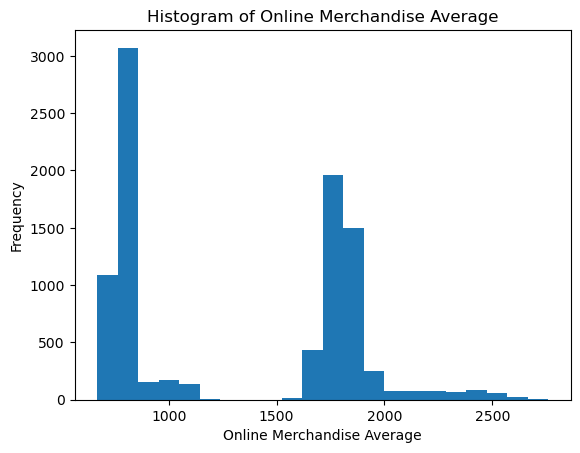

In [27]:
# quantitative variable, bimodal distribution. OK to use as is
plt.hist(family['online_merch_avg'], bins='auto')
plt.title('Histogram of Online Merchandise Average')
plt.xlabel('Online Merchandise Average')
plt.ylabel('Frequency')
plt.show()

<strong>RESULTS:</strong><br>
- The distribution of online spending is bimodal.
- Bimodal distributions tell us two distinct or mixture types visitors that we are looking at the data. 
- It doesn't appear to be heavily skewed, so we'll keep this variable as is.

### Estimated Annual Travel Column

#### Stats est_annual_travel:

In [28]:
# est_annual_travel: annual travel spending
# quantitative variable, range = 0 to 49885, skewed right
summary_est_annual_travel = family['est_annual_travel'].describe()
summary_est_annual_travel

count    9250.00
mean     8233.20
std     10296.73
min         0.00
25%      1757.00
50%      3880.00
75%      9948.75
max     49885.00
Name: est_annual_travel, dtype: float64

<strong>RESULTS:</strong><br>
|                 | count | mean    | std      | min | 25%    | 50%   | 75%     | max    |
|-----------------|-------|---------|----------|-----|--------|-------|---------|--------|
| est_annual_travel | 9250  | 8233.20 | 10296.73 | 0.00| 1757.00| 3880.00| 9948.75 | 49885.00 |

- Here is a statistical summary of the annual travel spending. 
- The range is from 0 to 49885, with a mean age of 8233.

#### Histogram of est_annual_travel:

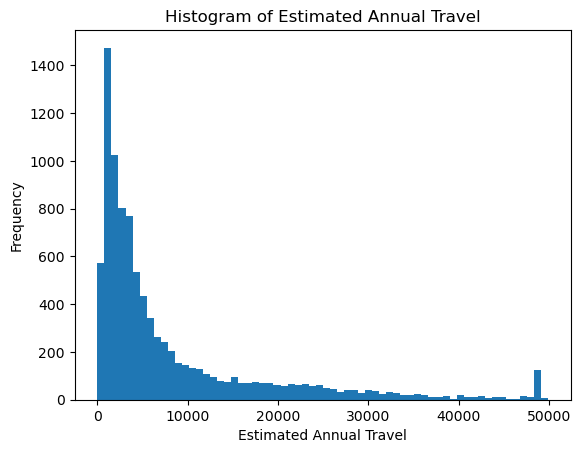

In [29]:
plt.hist(family['est_annual_travel'], bins='auto')
plt.title('Histogram of Estimated Annual Travel')
plt.xlabel('Estimated Annual Travel')
plt.ylabel('Frequency')
plt.show()

<strong>RESULTS:</strong><br>
- The distribution of Annual Travel is very much skewed right, which can be a problem for clustering. 
- Instead, we take the logarithm of this variable to see if the distribution is more symmetric.

**NOTE: log() function cannot work 0.00 value. It considers -infinitive. So then, we removed that row.**

In [30]:
# To see that error please uncommend the line.


# # Add the constant to avoid log(0) which results in -inf
# adjusted_travel_data = family['est_annual_travel']

# # Apply log transformation and plot histogram
# plt.hist(np.log(adjusted_travel_data.dropna()), bins='auto')
# plt.title('Histogram of Log of Estimated Annual Travel (Adjusted)')
# plt.xlabel('Log of Estimated Annual Travel (Adjusted)')
# plt.ylabel('Frequency')
# plt.show()

#### Finding the row:

In [31]:
# Filter out the zero and negative values
non_positive_entries = family[family['est_annual_travel'] <= 0]

# Display the raw entries
print("Non-positive entries in 'est_annual_travel':")
print(non_positive_entries)

Non-positive entries in 'est_annual_travel':
      est_net_worth  est_inc  domestic  number_visits  number_children  \
6681           1696     4360         1              3                2   

     oldest_child_age  dis_plus_sub  online_merch_avg  est_annual_travel  \
6681            11.00             0            817.00               0.00   

      est_annual_leisure  est_hhold_FICO  
6681             3384.00             720  


#### Revoming the row:

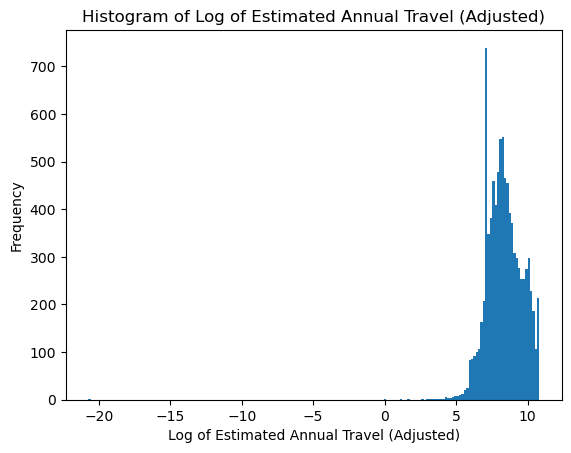

In [32]:
# Define a small constant to add to all values
small_constant = 1e-9

# Add the constant to avoid log(0) which results in -inf
adjusted_travel_data = family['est_annual_travel'] + small_constant

# Apply log transformation and plot histogram
plt.hist(np.log(adjusted_travel_data.dropna()), bins='auto')
plt.title('Histogram of Log of Estimated Annual Travel (Adjusted)')
plt.xlabel('Log of Estimated Annual Travel (Adjusted)')
plt.ylabel('Frequency')
plt.show()

<strong>RESULTS:</strong><br>
- As we can see, the distribution of the logarithm of annual travel is much more symmetrical, thus it will work out better for the clustering algorithm. 
- We'll use the logarithm of annual travel in the clustering algorithm.

### Estimated Annual Leisure Column

#### Stats of est_annual_leisure:

In [33]:
# est_annual_leisure: annual leisure spending
# quantitative variable, range = 2 to 74805, skewed right
summary_est_annual_leisure = family['est_annual_leisure'].describe()
summary_est_annual_leisure

count    9250.00
mean     8933.81
std     13101.42
min         2.00
25%      1891.00
50%      3632.00
75%      9203.75
max     74805.00
Name: est_annual_leisure, dtype: float64

#### Histogram of est_annual_leisure:

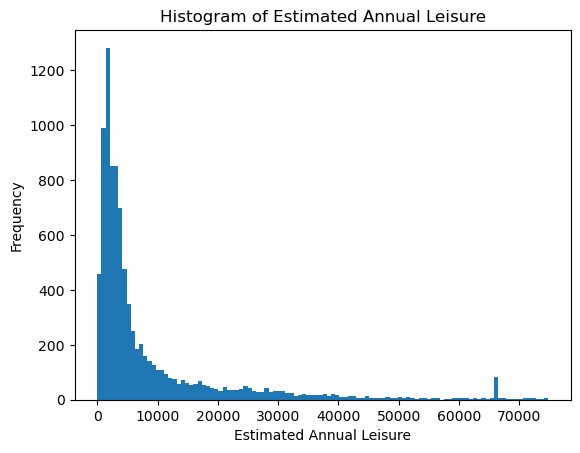

In [34]:
plt.hist(family['est_annual_leisure'], bins='auto')
plt.title('Histogram of Estimated Annual Leisure')
plt.xlabel('Estimated Annual Leisure')
plt.ylabel('Frequency')
plt.show()

<strong>RESULTS:</strong><br>
- The distribution of Annual Leisure is very much skewed right, which can be a problem for clustering. 
- Instead, we take the logarithm of this variable to see if the distribution is more symmetric.

#### Log Function for est_annual_leisure:

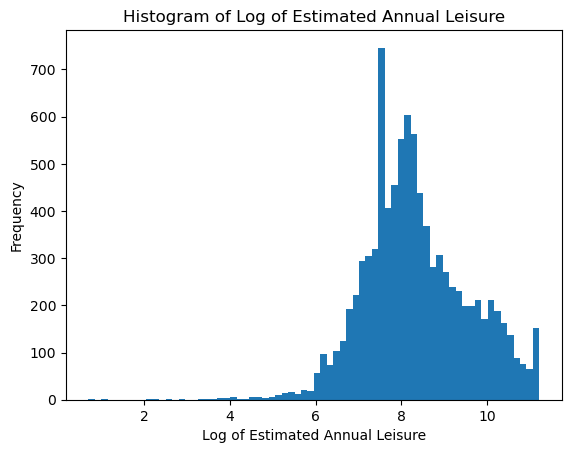

In [35]:
# making distribution much more symmetric
log_est_annual_leisure = np.log(family['est_annual_leisure'])

plt.hist(log_est_annual_leisure.dropna(), bins='auto')
plt.title('Histogram of Log of Estimated Annual Leisure')
plt.xlabel('Log of Estimated Annual Leisure')
plt.ylabel('Frequency')
plt.show()

<strong>RESULT:</strong><br>
- As we can see, the distribution of the logarithm of annual leisure is much more symmetrical, thus it will work out better for the clustering algorithm. 
- We'll use the logarithm of annual leisure in the clustering algorithm.

### Estimated Household FICO Column

#### Stats of est_hhold_FICO:

In [36]:
# est_annual_hhold_FICO: FICO (credit) score
# quantitative variable, range = 655 to 847, symmetric
summary_est_annual_hhold_FICO = family['est_hhold_FICO'].describe()
summary_est_annual_hhold_FICO

count   9250.00
mean     750.28
std       25.33
min      655.00
25%      733.00
50%      750.00
75%      768.00
max      847.00
Name: est_hhold_FICO, dtype: float64

<strong>RESULTS:</strong><br>
|                      | count | mean  | std   | min  | 25%  | 50%  | 75%  | max  |
|----------------------|-------|-------|-------|------|------|------|------|------|
| est_annual_hhold_FICO | 9250  | 750.28| 25.33 | 655  | 733  | 750  | 768  | 847  |

- Here is a statisitcal summary of the estimated household FICO. 
- The range is from 655 to 847, with a mean age of 750.

#### Histogram of est_hhold_FICO:

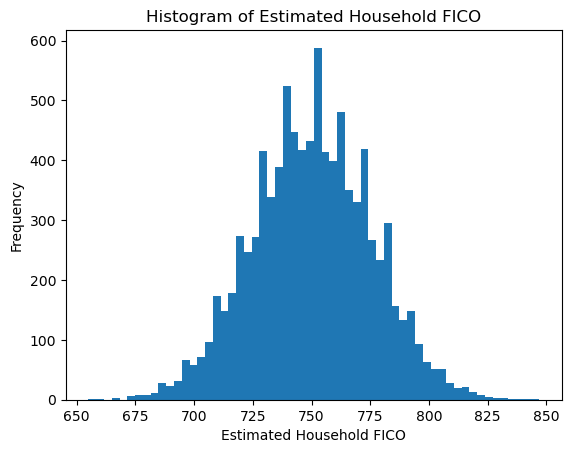

In [37]:
plt.hist(family['est_hhold_FICO'], bins='auto') 
plt.title('Histogram of Estimated Household FICO')
plt.xlabel('Estimated Household FICO')
plt.ylabel('Frequency')
plt.show()

<strong>RESULTS</strong><br>
- The distribution of estimated household FICO scores is very symmetric.
- We will use that variable as is.

## Step 7: Handling Missing Values

#### Finding  how many times the value 'None' appears in the oldest_child_age column:

In [38]:
#handling missing oldest_child_age. Set to 0
none_count = (family['oldest_child_age'] == 'None').sum()

print(none_count)

526


#### Replacing all occurrences of 'None' in the oldest_child_age column with 0:

In [39]:
family.loc[family['oldest_child_age'] == 'None', 'oldest_child_age'] = 0

#### Checking how many 0s in the oldest_child_age column:

In [40]:
zero_count = (family['oldest_child_age'] == 0).sum()

print(zero_count)

526


#### Frequency of each combination of oldest_child_age and number_children with cross-tabulation:

In [41]:
cross_tabulation_2 = pd.crosstab(
    family['oldest_child_age'],
    family['number_children'],
    dropna=False  # This should not be necessary now since there are no NaN values
)

print(cross_tabulation_2)

number_children     0    1    2    3    4   5  6  7
oldest_child_age                                   
0.00              526    0    0    0    0   0  0  0
5.00                0    1    2    1    0   0  0  0
6.00                0    7   11    8    2   1  0  0
7.00                0   22   28   21    7   2  0  0
8.00                0   66   88   70   24   5  2  0
9.00                0  127  219  180   78  14  0  0
10.00               0  236  335  293  108  22  3  0
11.00               0  319  509  447  169  24  1  0
12.00               0  406  630  538  172  37  5  0
13.00               0  322  559  459  161  24  4  1
14.00               0  215  385  304  131  21  1  1
15.00               0  110  215  169   52  10  1  0
16.00               0   57   98   64   26   2  1  0
17.00               0   14   36   18    5   2  0  0
18.00               0    2    6    4    4   0  0  0


#### Make sure there are no missing values in the oldest_child_age

In [42]:
family['oldest_child_age'].isnull().sum()

0

#### Checking the data types for the oldest_child_age

In [43]:
family['oldest_child_age'].dtypes

dtype('O')

#### Convert all entries in 'oldest_child_age' to numeric, turning unconvertible strings to NaN

In [44]:
family['oldest_child_age'] = pd.to_numeric(family['oldest_child_age'], errors='coerce')
family['oldest_child_age'].dtypes

dtype('float64')

#### Frequency of the oldest_child_age

In [45]:
family['oldest_child_age'].value_counts().sort_index()

oldest_child_age
0.00      526
5.00        4
6.00       29
7.00       80
8.00      255
9.00      618
10.00     997
11.00    1469
12.00    1788
13.00    1530
14.00    1058
15.00     557
16.00     248
17.00      75
18.00      16
Name: count, dtype: int64

<strong>RESULTS:</strong><br>
- Now, oldest_child_age range 0-18. There are no missing values.

<strong>RESULTS:</strong><br>
- number_children and oldest_child_age variables should be consired together. 
- Disney dataset divided by different parts.
- If we want to combine them (join table), we should use same variables such as, hhold_ID, number_children_oldest_child_age.
    - So, if we make any changes either of them, it will affect the other.

        - For those families who do not have children, we set the oldest child age to 0.

## Step 8: Creating New Columns

In [46]:
#add columns for logarithms of some quantitative variables
family['log_est_net_worth'] = np.log(family['est_net_worth'])
family['log_est_inc'] = np.log(family['est_inc'])
family['log_est_annual_travel'] = np.log(family['est_annual_travel'] + 1)
family['log_est_annual_leisure'] = np.log(family['est_annual_leisure'])

In [47]:
family.columns

Index(['est_net_worth', 'est_inc', 'domestic', 'number_visits',
       'number_children', 'oldest_child_age', 'dis_plus_sub',
       'online_merch_avg', 'est_annual_travel', 'est_annual_leisure',
       'est_hhold_FICO', 'log_est_net_worth', 'log_est_inc',
       'log_est_annual_travel', 'log_est_annual_leisure'],
      dtype='object')

## Step 9: Selecting Columns for Segmentation Analysis (K-Means Clustering)

In [48]:
# Select the quantitative columns
family_quant = family[["number_visits", "number_children",
                       "oldest_child_age", "online_merch_avg",
                       "est_hhold_FICO", "log_est_net_worth",
                       "log_est_inc", "log_est_annual_travel",
                       "log_est_annual_leisure"]]

# Get summary statistics excluding NaN values
summary_quant = family_quant.describe()
summary_quant

,number_visits,number_children,oldest_child_age,online_merch_avg,est_hhold_FICO,log_est_net_worth,log_est_inc,log_est_annual_travel,log_est_annual_leisure
count,9250.00,9250.00,9250.00,9250.00,9250.00,9250.00,9250.00,9250.00,9250.00
mean,2.67,2.22,11.30,1324.08,750.28,11.96,11.73,8.34,8.35
std,3.30,1.12,3.40,537.16,25.33,1.91,1.75,1.21,1.22
min,0.00,0.00,0.00,669.00,655.00,3.93,5.91,0.00,0.69
25%,1.00,1.00,10.00,786.00,733.00,10.66,10.41,7.47,7.54
50%,2.00,2.00,12.00,1378.50,750.00,12.02,11.72,8.26,8.20
75%,3.00,3.00,13.00,1804.00,768.00,13.38,13.03,9.21,9.13
max,47.00,7.00,18.00,2759.00,847.00,16.11,15.52,10.82,11.22


## Step 10: Data Scaling

In [49]:
scaler = StandardScaler()
scaler.fit(family_quant)

family_quant_normalized = scaler.transform(family_quant)
family_quant_normalized = pd.DataFrame(data = family_quant_normalized, index = 
                                       family_quant.index, columns = family_quant.columns)
print(family_quant_normalized.describe().round(2))

       number_visits  number_children  oldest_child_age  online_merch_avg  \
count        9250.00          9250.00           9250.00           9250.00   
mean            0.00            -0.00              0.00             -0.00   
std             1.00             1.00              1.00              1.00   
min            -0.81            -1.98             -3.33             -1.22   
25%            -0.51            -1.09             -0.38             -1.00   
50%            -0.20            -0.20              0.21              0.10   
75%             0.10             0.69              0.50              0.89   
max            13.45             4.25              1.97              2.67   

       est_hhold_FICO  log_est_net_worth  log_est_inc  log_est_annual_travel  \
count         9250.00            9250.00      9250.00                9250.00   
mean            -0.00              -0.00        -0.00                   0.00   
std              1.00               1.00         1.00             

<strong>RESULTS:</strong><br>
- The data is scaled for the clustering algorithm. 
- It will make it more normalized across all variables when calculating distances from the center.

## Step 11: Elbow Chart

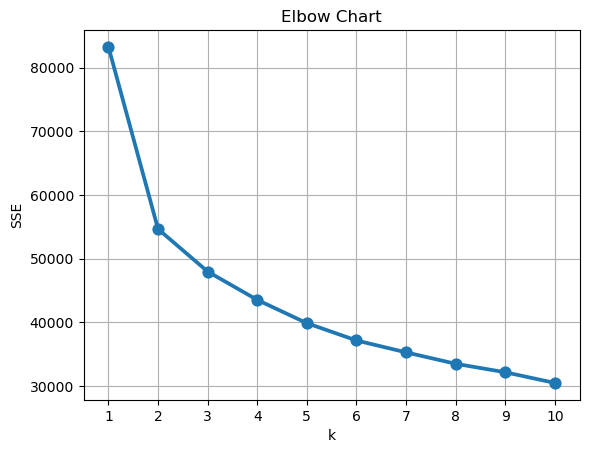

In [50]:
sse = {}
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, n_init= 10, random_state=654)
    kmeans.fit(family_quant_normalized)
    sse[k] = kmeans.inertia_
    
plt.title('Elbow Chart')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x = list(sse.keys()), y = list(sse.values()))
plt.grid(True)

<strong>RESULTS:</strong><br>
- The Elbow chart shows the largest decrease from 1 cluster to 2 clusters. 
- It looks like the elbow is at n = 2 clusters. 
- Since this may not show the full variety of clusters, we may want to consider more.

## Step 12: Finding Better 'n' Number

<strong> Test for n = 3 </strong>

In [51]:
kmeans_model_1 = KMeans(n_clusters=3, n_init=10, random_state=654)
kmeans_model_1.fit(family_quant_normalized)

labels_1 = kmeans_model_1.predict(family_quant_normalized)

In [52]:
model_1_info = family_quant.assign(Cluster = labels_1)

grouped1 = model_1_info.groupby(['Cluster'])
grouped1.agg({
    "number_visits": "mean", 
    "number_children": "mean",
    "oldest_child_age": "mean", 
    "online_merch_avg": "mean",
    "est_hhold_FICO": "mean",
    "log_est_net_worth": "mean",
    "log_est_inc": "mean",
    "log_est_annual_travel": "mean",
    "log_est_annual_leisure": "mean"
}).round(2)

,number_visits,number_children,oldest_child_age,online_merch_avg,est_hhold_FICO,log_est_net_worth,log_est_inc,log_est_annual_travel,log_est_annual_leisure
Cluster,,,,,,,,,
0,2.64,2.36,11.99,1840.56,749.75,13.48,13.17,9.11,9.13
1,2.67,2.36,11.98,806.15,750.49,10.40,10.27,7.58,7.55
2,2.93,0.01,0.03,1272.55,752.88,11.98,11.75,8.27,8.36


<strong>Test for n = 4 </strong>

In [53]:
kmeans_model_2 = KMeans(n_clusters=4, n_init=10, random_state=654)
kmeans_model_2.fit(family_quant_normalized)

labels_2 = kmeans_model_2.predict(family_quant_normalized)

In [54]:
model_2_info = family_quant.assign(Cluster = labels_2)

grouped2 = model_2_info.groupby(['Cluster'])
grouped2.agg({
    "number_visits": "mean", 
    "number_children": "mean",
    "oldest_child_age": "mean", 
    "online_merch_avg": "mean",
    "est_hhold_FICO": "mean",
    "log_est_net_worth": "mean",
    "log_est_inc": "mean",
    "log_est_annual_travel": "mean",
    "log_est_annual_leisure": "mean"
}).round(2)

,number_visits,number_children,oldest_child_age,online_merch_avg,est_hhold_FICO,log_est_net_worth,log_est_inc,log_est_annual_travel,log_est_annual_leisure
Cluster,,,,,,,,,
0,2.93,0.00,0.02,1271.47,752.79,11.98,11.75,8.27,8.36
1,2.77,2.34,11.97,1842.16,750.67,14.27,13.94,9.95,10.04
2,2.56,2.39,12.00,1834.04,749.10,12.90,12.61,8.50,8.48
3,2.66,2.35,11.98,804.09,750.50,10.40,10.26,7.57,7.54


<strong>Test for n = 5 </strong>

In [55]:
kmeans_model_3 = KMeans(n_clusters=5, n_init=10, random_state=654)
kmeans_model_3.fit(family_quant_normalized)

labels_3 = kmeans_model_3.predict(family_quant_normalized)

In [56]:
model_3_info = family_quant.assign(Cluster = labels_3)

grouped3 = model_3_info.groupby(['Cluster'])
grouped3.agg({
    "number_visits": "mean", 
    "number_children": "mean",
    "oldest_child_age": "mean", 
    "online_merch_avg": "mean",
    "est_hhold_FICO": "mean",
    "log_est_net_worth": "mean",
    "log_est_inc": "mean",
    "log_est_annual_travel": "mean",
    "log_est_annual_leisure": "mean"
}).round(2)

,number_visits,number_children,oldest_child_age,online_merch_avg,est_hhold_FICO,log_est_net_worth,log_est_inc,log_est_annual_travel,log_est_annual_leisure
Cluster,,,,,,,,,
0,2.23,2.35,11.97,802.59,750.40,10.39,10.26,7.57,7.53
1,2.36,2.33,11.96,1838.64,750.45,14.28,13.95,9.95,10.04
2,2.16,2.39,12.00,1830.73,748.94,12.90,12.61,8.49,8.48
3,15.59,2.27,12.02,1394.65,753.98,11.97,11.73,8.44,8.44
4,2.72,0.00,0.02,1274.45,753.03,11.99,11.76,8.27,8.37


<strong>RESULT</strong><br>
As we can see, n = 5 shows a higher range than the others. I will create my model with cluster 5.

## Step 13: Creating a Model with the Chosen Number

### Chosen n=5 

In [57]:
kmeans_model = KMeans(n_clusters=5, n_init=10, random_state=654)
kmeans_model.fit(family_quant_normalized)

labels = kmeans_model.predict(family_quant_normalized)

In [58]:
labels = kmeans_model.predict(family_quant_normalized)
model_info = family_quant.assign(Cluster=labels)

grouped = model_info.groupby(['Cluster'])
grouped_summary = grouped.agg({
    "number_visits": "mean", 
    "number_children": "mean",
    "oldest_child_age": "mean", 
    "online_merch_avg": "mean",
    "est_hhold_FICO": "mean",
    "log_est_net_worth": "mean",
    "log_est_inc": "mean",
    "log_est_annual_travel": "mean",
    "log_est_annual_leisure": "mean"
}).round(2)
grouped_summary

,number_visits,number_children,oldest_child_age,online_merch_avg,est_hhold_FICO,log_est_net_worth,log_est_inc,log_est_annual_travel,log_est_annual_leisure
Cluster,,,,,,,,,
0,2.23,2.35,11.97,802.59,750.40,10.39,10.26,7.57,7.53
1,2.36,2.33,11.96,1838.64,750.45,14.28,13.95,9.95,10.04
2,2.16,2.39,12.00,1830.73,748.94,12.90,12.61,8.49,8.48
3,15.59,2.27,12.02,1394.65,753.98,11.97,11.73,8.44,8.44
4,2.72,0.00,0.02,1274.45,753.03,11.99,11.76,8.27,8.37


In [59]:
family_quant.columns

Index(['number_visits', 'number_children', 'oldest_child_age',
       'online_merch_avg', 'est_hhold_FICO', 'log_est_net_worth',
       'log_est_inc', 'log_est_annual_travel', 'log_est_annual_leisure'],
      dtype='object')

## Step 14: Visualization

<strong>Plot 1: Boxplots of each of the 9 variables split by cluster</strong>

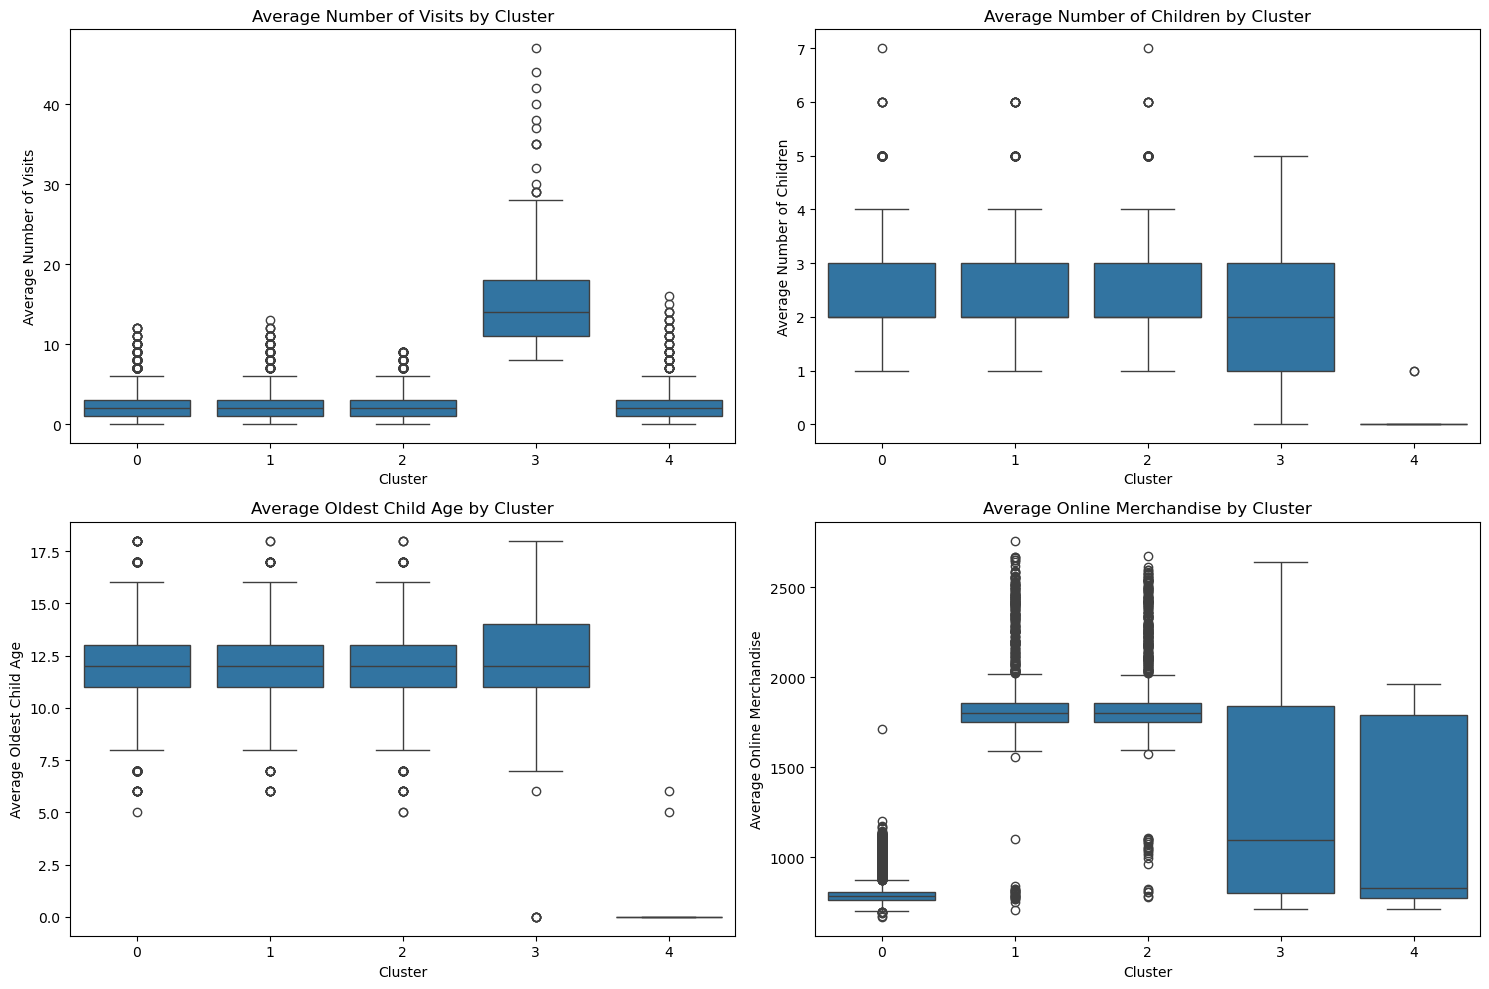

In [60]:
# Select only the relevant columns for visualization from the original dataframe
family_visualization = family_quant[['number_visits', 'number_children', 'oldest_child_age',
       'online_merch_avg', 'est_hhold_FICO', 'log_est_net_worth',
       'log_est_inc', 'log_est_annual_travel', 'log_est_annual_leisure']].copy()

# Add the cluster labels to the DataFrame for visualization
family_visualization['cluster'] = labels  # 'labels' comes from the kmeans_model.predict() result

# Set up the matplotlib figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))  

# Define titles and labels for each subplot
titles = ['Average Number of Visits by Cluster', 'Average Number of Children by Cluster',
          'Average Oldest Child Age by Cluster', 'Average Online Merchandise by Cluster',
         'Average Estimated HHold Fico by Cluster', 'Average Estimated Net Worth by Cluster',
         'Average Estimated Income by Cluster', 'Average Estimated Annual Travel by Cluster', 
          'Average Estimated Annual Leisure by Cluster']

y_labels = ['Average Number of Visits', 'Average Number of Children',
          'Average Oldest Child Age', 'Average Online Merchandise',
         'Average Estimated HHold Fico', 'Average Estimated Net Worth',
         'Average Estimated Income', 'Average Estimated Annual Travel', 
          'Average Estimated Annual Leisure']

# Iterate over each subplot and create boxplots
for i, ax in enumerate(axs.flat):
    # Ensure the column name is correct and exists in df_visualization
    sns.boxplot(x='cluster', y=family_visualization.columns[i], data=family_visualization, ax=ax)
    ax.set_title(titles[i])
    ax.set_xlabel('Cluster')
    ax.set_ylabel(y_labels[i])
    

# Adjust layout for better display and avoid label overlap
plt.tight_layout()
plt.show()

<strong>RESULTS:</strong><br>
- From the box plots it looks as if families in Cluster 3 visit Disney the most often, while the other clusters are roughly the same frequency. <br>
- Families in cluster 4 do not have any children (hence this is why the average age of the oldest child is 0).<br>      - Clusters 1 and 2 spend the most in online merchandise, while cluster 0 spend the least.

<strong>Plot 2: Scatterplot Merchandise Spending vs Net Worth</strong>

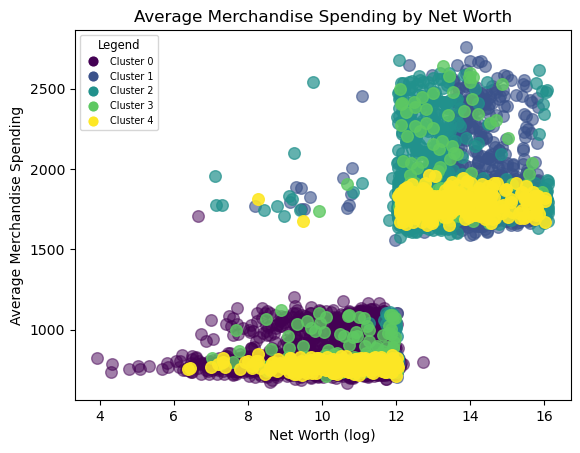

In [61]:
# Define a single marker and size for all clusters
marker = 'o'
size = 70  # Example size for each point

# Define a colormap to use different colors for each cluster
# Updated method to get a colormap
colormap = plt.colormaps['viridis'](np.linspace(0, 1, len(np.unique(model_info['Cluster']))))

# Create a scatter plot for each cluster with varying colors and transparency
for i, cluster in enumerate(np.unique(model_info['Cluster'])):
    cluster_data = model_info[model_info['Cluster'] == cluster]
    plt.scatter(cluster_data['log_est_net_worth'], cluster_data['online_merch_avg'],
                marker=marker, s=size, color=colormap[i],
                alpha=0.5 + (0.5 * i / len(np.unique(model_info['Cluster']))),  # Gradual increase in alpha
                label=f"Cluster {cluster}")

# Set the title and labels
plt.title("Average Merchandise Spending by Net Worth")
plt.xlabel("Net Worth (log)")
plt.ylabel("Average Merchandise Spending")

# Create a legend with dummy points for color reference
legend_handles = [plt.Line2D([0], [0], marker=marker, color='w',
                             markerfacecolor=colormap[i], markersize=np.sqrt(size),
                             label=f'Cluster {i}')
                  for i in range(len(np.unique(model_info['Cluster'])))]

plt.legend(handles=legend_handles, title="Legend", title_fontsize='small', fontsize='x-small', loc="upper left")

# Show the plot
plt.show()

<strong>RESULTS:</strong><br>
- Cluster 1,2,3,4 primarily in the upper right hand region.
    - This indicates that both Net Worth and Average Merchandise Spending are higher than average.
- Some values on the middle which indicates average for the Cluster 0,1,2,3,4. 
    - So, we might say each cluster some point spending and net worth is average.
    - But also, it small variety.
    - So, we can discard them.
- Majority of Cluster 0 and Cluster 3, 4 towards the bottom, but centered left to right.
     - This indicates even the net worth is higher, average merchandise spending is lower.

<strong>Plot 3: Heat Map</strong>

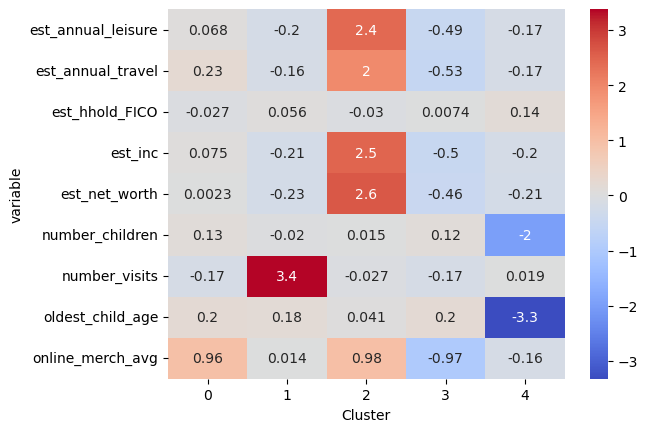

In [62]:
# Standardize the quantitative variables
scaler = StandardScaler()
family_quant_std = scaler.fit_transform(family[[
                           "number_visits","number_children",
                           "oldest_child_age","online_merch_avg",
                           "est_hhold_FICO","est_net_worth",
                           "est_inc","est_annual_travel",
                           "est_annual_leisure"
]])

# Fit the KMeans model with 5 clusters
kmeans_model = KMeans(n_clusters=5, n_init=10, random_state=654)
kmeans_model.fit(family_quant_std)

# Predict the cluster labels
labels = kmeans_model.predict(family_quant_std)

# Add the cluster labels to your original DataFrame
family['Cluster'] = labels

# Calculate the mean for each cluster for standardized values
cluster_means_std = pd.DataFrame(family_quant_std, columns=[
                           "number_visits","number_children",
                           "oldest_child_age","online_merch_avg",
                           "est_hhold_FICO","est_net_worth",
                           "est_inc","est_annual_travel",
                           "est_annual_leisure"])
cluster_means_std['Cluster'] = labels
cluster_means_std = cluster_means_std.groupby('Cluster').mean().reset_index().melt(id_vars='Cluster')

# Calculate the mean for each cluster for actual values, specifying numeric_only=True to avoid FutureWarning
cluster_means_actual = family[['number_visits', 'number_children',
                               'oldest_child_age', 'online_merch_avg',
                               'est_hhold_FICO', 'est_net_worth',
                               'est_inc', 'est_annual_travel',
                               'est_annual_leisure', 'Cluster']]
cluster_means_actual = cluster_means_actual.groupby('Cluster').mean(
    numeric_only=True).reset_index().melt(id_vars='Cluster')

# Merge the standardized and actual means on Cluster and variable name
cluster_means_merged = pd.merge(cluster_means_std, cluster_means_actual, 
                                on=['Cluster', 'variable'], suffixes=('_std', '_actual'))

# Create the heatmap using seaborn and specify keyword arguments to avoid FutureWarning
heatmap_data = cluster_means_merged.pivot(index='variable', columns='Cluster', values='value_std')
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True)

# Show the plot
plt.show()

<strong>RESULT:</strong><br>
We used the original variables for that not log ones.
- Cluster 0 higher on average online merchandise spending.
- Cluster 1 higher on number of visitis.
- Cluster 2 Higher on estimated net worth, estimated income, estimated annual travel, and estimated annual leisure.
- Cluster 3 higher on number visit and number children.
- Cluster 4 higher on estimated household FICO.

<strong>Plot 4: Density Map</strong>

#### Density Plot of Average Estimated Annual Travel by Cluster:

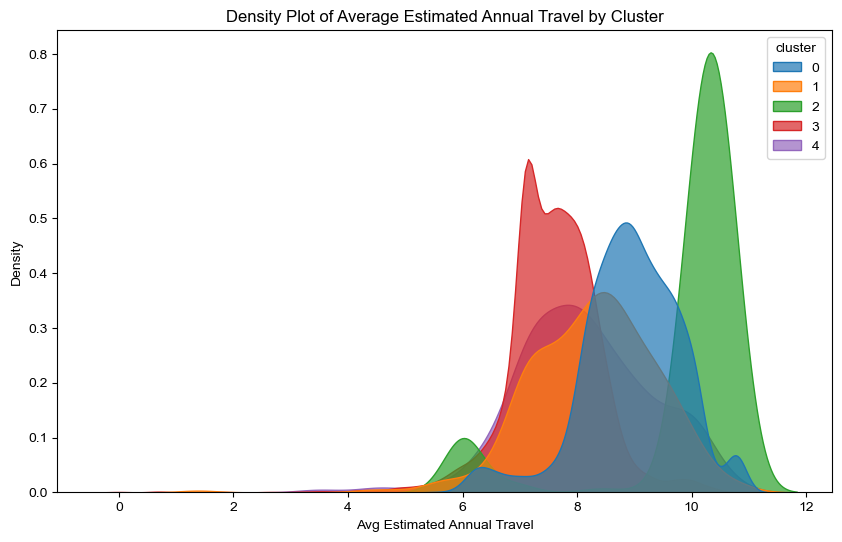

In [63]:
#based on above findings, 
#we will look closely density of log_est_annual_travel, log_est_annual_leisure, 
#online_merch_avg, number_visits, number_children

model_info['cluster'] = labels

# Convert the cluster column to a categorical type
model_info['cluster'] = model_info['cluster'].astype('category')

# Plotting with seaborn
plt.figure(figsize=(10, 6))  # Adjust the size as needed

sns.kdeplot(
    data=model_info,
    x='log_est_annual_travel',  # Replace with your actual column name
    hue='cluster',  # Make sure this is the name of your cluster column
    fill=True,
    common_norm=False,  # This ensures that the densities are normalized separately for each cluster
    alpha=0.7
)

plt.title('Density Plot of Average Estimated Annual Travel by Cluster')
plt.xlabel('Avg Estimated Annual Travel')
plt.ylabel('Density')

# Use this if you want to replicate the theme_minimal from ggplot2
sns.set_theme(style="whitegrid")

plt.show()

<strong>RESULTS:</strong><br>
- Cluster 2 is higher on Estimated Annual Travel.

#### Density Plot of Average Estimated Annual Leisure by Cluster:

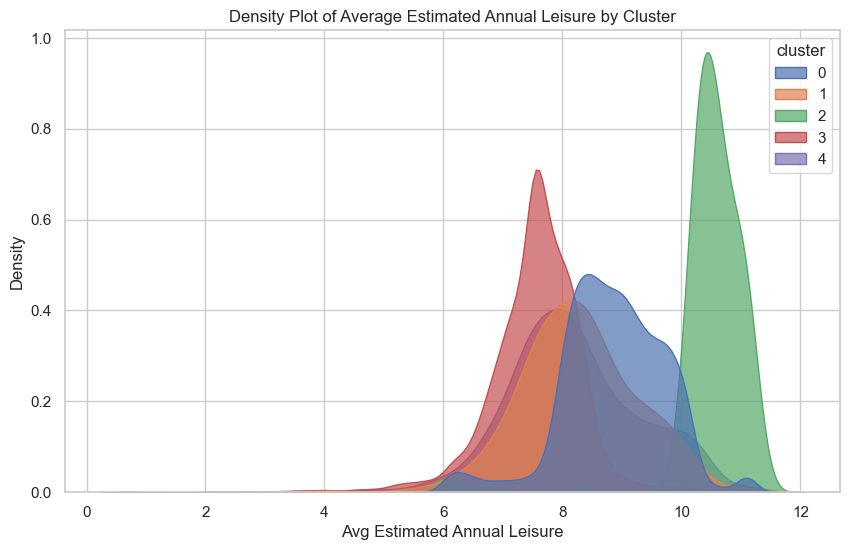

In [64]:
model_info['cluster'] = labels

# Convert the cluster column to a categorical type
model_info['cluster'] = model_info['cluster'].astype('category')

# Plotting with seaborn
plt.figure(figsize=(10, 6))  # Adjust the size as needed

sns.kdeplot(
    data=model_info,
    x='log_est_annual_leisure',  # Replace with your actual column name
    hue='cluster',  # Make sure this is the name of your cluster column
    fill=True,
    common_norm=False,  # This ensures that the densities are normalized separately for each cluster
    alpha=0.7
)

plt.title('Density Plot of Average Estimated Annual Leisure by Cluster')
plt.xlabel('Avg Estimated Annual Leisure')
plt.ylabel('Density')

# Use this if you want to replicate the theme_minimal from ggplot2
sns.set_theme(style="whitegrid")

plt.show()

<strong>RESULTS:</strong><br>
- Cluster 2 is higher on Estimated Annual Leisure.

#### Density Plot of Average Online Merchandise by Cluster:

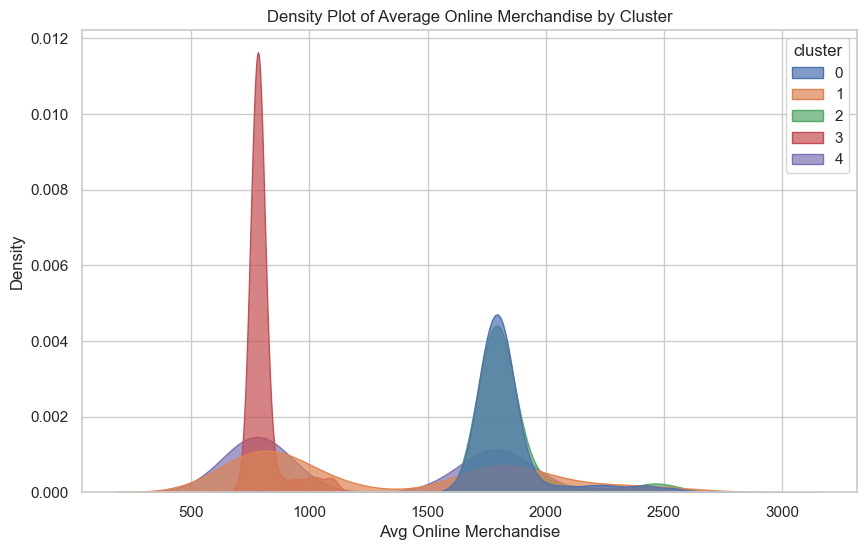

In [65]:
model_info['cluster'] = labels

# Convert the cluster column to a categorical type
model_info['cluster'] = model_info['cluster'].astype('category')

# Plotting with seaborn
plt.figure(figsize=(10, 6))  # Adjust the size as needed

sns.kdeplot(
    data=model_info,
    x='online_merch_avg',  # Replace with your actual column name
    hue='cluster',  # Make sure this is the name of your cluster column
    fill=True,
    common_norm=False,  # This ensures that the densities are normalized separately for each cluster
    alpha=0.7
)

plt.title('Density Plot of Average Online Merchandise by Cluster')
plt.xlabel('Avg Online Merchandise')
plt.ylabel('Density')

# Use this if you want to replicate the theme_minimal from ggplot2
sns.set_theme(style="whitegrid")

plt.show()

<strong>RESULTS:</strong><br>
- Cluster 3 is higher on Average Online Merchandise between Cluster 4, 1 and 3.
    - However, those clusters left on the diagram. So, we should compare Cluster 0, 2, and 4.
- Cluster 0, 2 and 4 close each other on Average Online Merchandise.

#### Density Plot of Number Visits by Cluster:

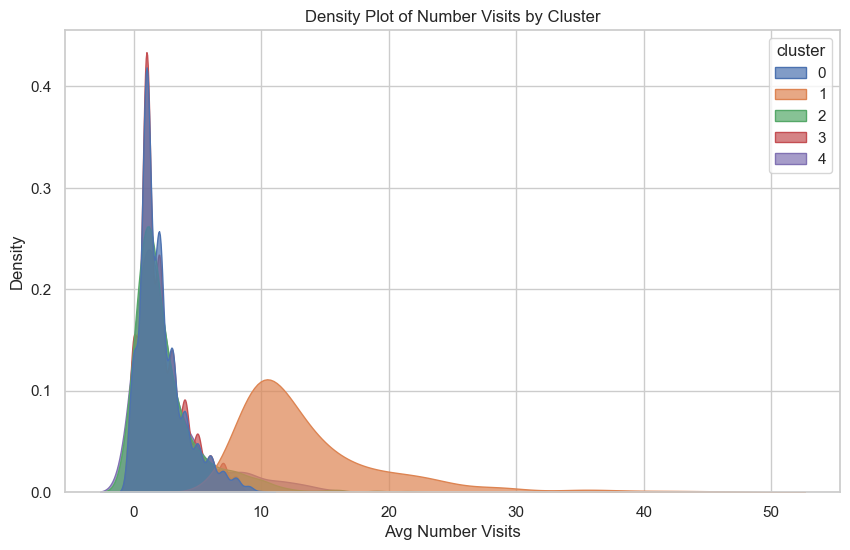

In [66]:
model_info['cluster'] = labels

# Convert the cluster column to a categorical type
model_info['cluster'] = model_info['cluster'].astype('category')

# Plotting with seaborn
plt.figure(figsize=(10, 6))  # Adjust the size as needed

sns.kdeplot(
    data=model_info,
    x='number_visits',  # Replace with your actual column name
    hue='cluster',  # Make sure this is the name of your cluster column
    fill=True,
    common_norm=False,  # This ensures that the densities are normalized separately for each cluster
    alpha=0.7
)

plt.title('Density Plot of Number Visits by Cluster')
plt.xlabel('Avg Number Visits')
plt.ylabel('Density')

# Use this if you want to replicate the theme_minimal from ggplot2
sns.set_theme(style="whitegrid")

plt.show()

<strong>RESULTS:</strong><br>
- Clusters 3 and 4 have a higher average number of visits.

#### Density Plot of Number Children by Cluster:

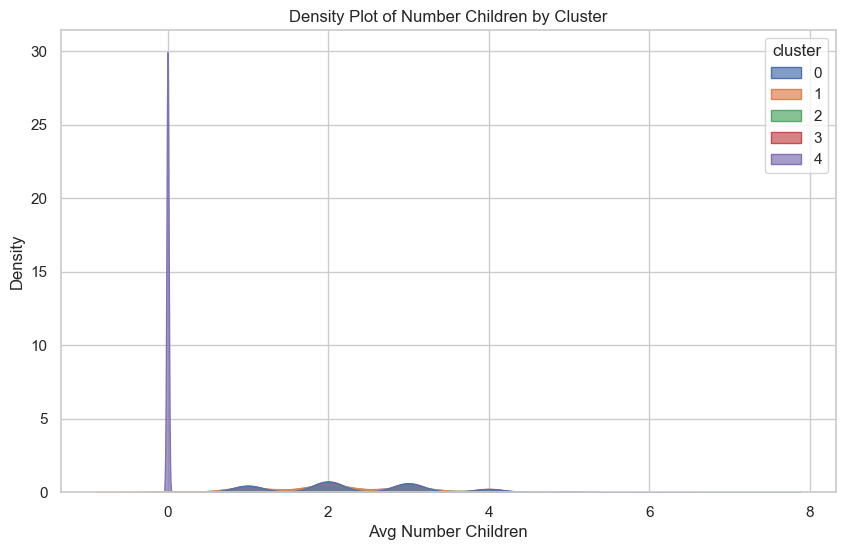

In [67]:
model_info['cluster'] = labels

# Convert the cluster column to a categorical type
model_info['cluster'] = model_info['cluster'].astype('category')

# Plotting with seaborn
plt.figure(figsize=(10, 6))  # Adjust the size as needed

sns.kdeplot(
    data=model_info,
    x='number_children',  # Replace with your actual column name
    hue='cluster',  # Make sure this is the name of your cluster column
    fill=True,
    common_norm=False,  # This ensures that the densities are normalized separately for each cluster
    alpha=0.7
)

plt.title('Density Plot of Number Children by Cluster')
plt.xlabel('Avg Number Children')
plt.ylabel('Density')

# Use this if you want to replicate the theme_minimal from ggplot2
sns.set_theme(style="whitegrid")

plt.show()

<strong>RESULTS:</strong><br>
- Cluster 4 is higher on having zero child.

### ** Results & Findings**

- Based on the given dataset, visitors without childreb number is 526. WE have 9250 records.
    - So, 5% of visitors do not have children.
    - Visitors have average 2 children and average oldest child age is 12.
        - So then, we can say majority of visitors have children.
    - Majority of the visit numbers are 0 time: 1086, 1 time: 3253, 2 times: 1793, 3 times: 1037.
    - Average Spending Online Merchandise variable tells there are distinnct or mixture of the 2 groups.
        - Cluster results show same mixture also. 
        - So then, we can say except Cluster 4, spending online merchandise is a subject for each cluster.<br><br>
            
- Cluster 0: Net Worth is higher. However, spending Online Merchandise differs chart by chart.
     - So, we can consider that they have money and  spending money on online merchandise when they need.
     - Maybe, special days are important for them.
     - We need to do further investigation on their age and job.<br><br>
     
- Cluster 1: Estimated HoulseHold FICO, Estimated Annual Travel and Leisure, Net Worth, and spending Online Merchandise are higher.
    - So, we can consider that they are weatlh and like shopping from online merchandise store.<br><br>
    
- Cluster 2: Estimated Annual Travel and spending Online Merchandise are higher.
    - So, we can consider that they like traveling and spending money on online merchandise.<br><br>
    
- Cluster 3: Net Worth and Number Visit are higher. However, they do not spend more money on shopping online merchandise.
    - So then, we can consider that they visit more. Also, they do not want to spend money on shopping online merchandise.
    - We can check their eating behavior when they visit the Disney and then generalized their behavior.
    - Because, then we can see either they spend more money for eating or visiting (visiting only for fun.)
    - Another chek point will be their age. Age will affect their behavior more.<br><br>
    
- Cluster 4: Estimated HoulseHold FICO, Net Worth, Number of Children are higher.
    - So, we can consider that they are weatlh and single.(No children.)<br><br>

* What can Disney do? *
    - More Attractions for:
        - Families who have children mostly age around 2 and up.
        - Families who have no children.
    - Offer Different Bundles:
        - Even people have money, our cluster result shows there is distinction on spending money online purchase.